# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

## Описание проекта

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах(м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

## Изучение данных из файла

In [1]:
# Импортируем необходимые для анализа библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Загрузим датасет и выведем первые 10 значений для ознакомления
realty_data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)

realty_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# Выведем общую информацию о датасете
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

В датасете имеется 23699 строк. Некоторые колонки имеют пропуски и несоответствующие типы данных.

## Предобработка данных

### Замена пропусков

Для лучшего понимания характера пропусков изучим с помощью метода `describe()` распределение значений в колонках датасета.

In [4]:
# Вывод информации о распределении данных
realty_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


У нас в датасете имеются пропуски для значений которые:
- точно определены, но могли быть не указаны человеком по причине отсутствия подробной информации;
- могли быть не указаны по причине отсутствия подобного признака, т.е. пропуск может быть альтернативой значению - 0;
- техническая ошибка, из-за которой не было заполнено значение.

Следующие колонки можно отнести к первому типу значений, которые точно должны быть определены, но могли быть не заполнены по причине отсутствия полной информации: `ceiling_height`, `floors_total`, `living_area`.

Изучим распределение значений в колонке `ceiling_height`. Посмотрим какая зависимость имеется между высотой потолков и расстоянием до центра. Для этого предварительно сгруппируем расстояние до центра по километрам с интервалом в 1 км.

In [5]:
# Импортируем библиотеку math
import math

# Сгруппируем расстояние до центра с интервалом в 1 км
realty_data['cityCenters_nearest_km_grouped'] = realty_data['cityCenters_nearest'].apply(lambda x: math.floor(x/1000) if not math.isnan(x) else math.nan)
realty_data['cityCenters_nearest_km_grouped']

0        16.0
1        18.0
2        13.0
3         6.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest_km_grouped, Length: 23699, dtype: float64

(0.0, 10.0)

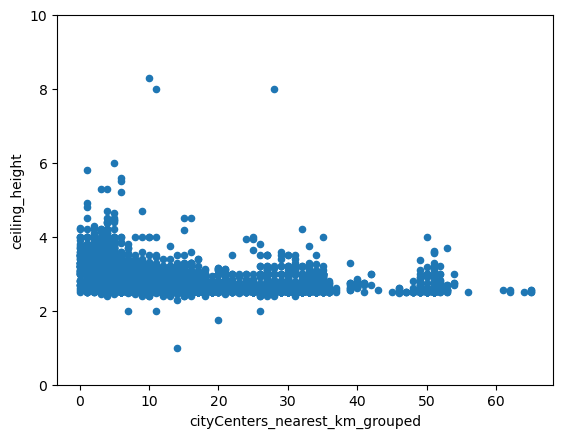

In [6]:
# Построим график распределения высоты потолков в зависимости от центра
realty_data.plot(y='ceiling_height', x='cityCenters_nearest_km_grouped', kind='scatter')
plt.ylim(0,10)

На графике мы видим, что ближе к центру находятся квартиры с большей высотой потолков. Таким образом, для заполнения пропущенных  значений мы можем использовать расстояние до центра. Для этого сгруппируем высоту потолков по расстоянию до центра с интервалом в 5 км, тк у нас могут быть группы в 1 км для которых не было найдено среднего значения, и найдем медианное значение для интервала, тк выбросы в некоторых интервалах могут оказать влияние на среднее. Сохраним полученную таблицу в отдельную переменную и запоолним пропуски в колонке `ceiling_height` при помощи этой таблицы.

In [7]:
# Сгруппируем расстояние до центра с интервалом в 5 км
realty_data['cityCenters_nearest_5km_grouped'] = realty_data['cityCenters_nearest'].apply(lambda x: 5 * math.floor(x/5000) if not math.isnan(x) else math.nan)

# Выведем среднюю для каждой группы
grouped_height = realty_data.groupby('cityCenters_nearest_5km_grouped')['ceiling_height'].agg('median')
grouped_height

cityCenters_nearest_5km_grouped
0.0     3.100
5.0     2.800
10.0    2.600
15.0    2.600
20.0    2.650
25.0    2.600
30.0    2.580
35.0    2.700
40.0    2.750
45.0    2.500
50.0    2.550
55.0    2.500
60.0    2.525
65.0    2.525
Name: ceiling_height, dtype: float64

In [8]:
# Создадим функцию для заполнения пропущенных значений:
# Заполняем только для тех значений, в которых есть пропуск 
# Округляем расстояние от центра до интервала в 5км и на основании этого значения определяем медианную высоту потолка из таблицы grouped_height
def fill_ceiling_height(row):
    ceiling_height = row['ceiling_height']
    if math.isnan(ceiling_height):
        cityCenters_nearest = row['cityCenters_nearest']
        if not math.isnan(cityCenters_nearest):
            in_5km = 5 * math.floor(cityCenters_nearest/5000)
            if in_5km > 65:
                in_5km = 65
            return grouped_height[in_5km]
        else:
            return math.nan
    else:
        return ceiling_height
    
realty_data['ceiling_height'] = realty_data.apply(fill_ceiling_height, axis=1)

In [9]:
# Посчитаем количество оставшихся пропущенных значений
realty_data['ceiling_height'].isna().sum()

2575

Для оставшихся колонок можно применить такой же метод замены пропусков. Но для колонки `living_area` возможно лучше взять медианное значение по количеству комнат, т.к. чем больше комнат - тем больше должна получаться общая площадь жилья. Построим диаграмму рассеяния и отобразим коэффициент корреляции по колонкам `rooms` и `living_area`, чтобы понять есть ли корреляция между этими характеристиками.

,rooms,living_area
rooms,1.000000,0.845977
living_area,0.845977,1.000000


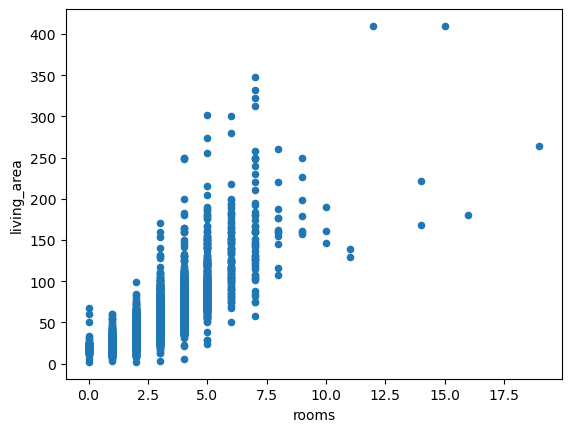

In [10]:
# Строим дигарамму рассеяния
realty_data.plot(x='rooms', y='living_area', kind='scatter')

# Выведем коэффициент корреляции
realty_data[['rooms', 'living_area']].corr()

Корреляция сильная и имеет положительный характер. В таком случае можно сгруппировать данные по колонке `rooms` и заполнить средним значением по группе колонку `living_area`, в зависимости от количества комнат.

In [11]:
# Делаем замену пустых значений колонки 'living_area' средними от групп по колонке 'rooms'
realty_data['living_area'] = (
    realty_data.groupby('rooms')['living_area']
    .transform(lambda group: group.fillna(group.mean()))
)

Заменим пропуски в колонке `floors_total` на медианное значение по колонке, т.к. стандартное отклонение от среднего тут больше, то среднее значение может быть либо занижено, либо завышено. Медиана будет предпочтительнее в качестве типичного значения для колонки.

In [12]:
# Замена пропусков на медианное значение колонки
realty_data['floors_total'] = realty_data['floors_total'].fillna(realty_data['floors_total'].median())

Посмотрим на значения в колонке `is_apartment`.

In [13]:
# Смотрим количество значений в колонке 'is_apartment'
realty_data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Колонка `is_apartment` указывает на то является данное жилье апартаментом или нет. В датасете очень небольшое количество заполненных значений по данной колонке, и сильно мало значений с параметром `True`. Либо это поле не было специально заполненно, либо жилье, у которого данное значение не заполнено относилось не к апартаментам. Каких-либо других параметров, указывающих на принадлежность к апартаментам, в датасете нет. Остается тогда все незаполненные значения в колонке заменить на `False`.

In [14]:
# Делаем замену пропусков на значение False
realty_data['is_apartment'] = realty_data['is_apartment'].fillna(False)

In [15]:
# Проверяем количество значений в колонке 'is_apartment'
realty_data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Пропуски в колонке `kitchen_area` могут быть обозначением отсутствия такой площади в квартире, например в студиях.

Посмотрим как распределяются значения колонки `kitchen_area` в зависимости от количества комнат.

In [16]:
# Выводим среднее значений в колонке 'kitchen_area' с группировкой по количеству комнат
realty_data.groupby('rooms')['kitchen_area'].agg('mean')

rooms
0            NaN
1       9.550118
2       9.979584
3      11.308580
4      13.664033
5      18.367649
6      21.048763
7      21.998077
8      24.866667
9      25.071429
10     22.866667
11     12.600000
12    112.000000
14     21.250000
15    100.000000
16     13.000000
19     27.600000
Name: kitchen_area, dtype: float64

После группировки мы видим, что есть значение комнат равное 0. Скорее всего это квартиры-студии, у которых отсутствует выделенная площадь кухни. Для таких значений пропуски можно заменить на 0.

In [17]:
# Замена пропусков в колонке 'kitchen_area' на 0 для студий
realty_data['kitchen_area'] = realty_data['kitchen_area'].where(realty_data['rooms'] > 0, 0)

Проверим, есть ли пропуски для квартир, в которых более 1 комнаты включительно.

In [18]:
# Выведем количество строк, в которых количество комнат больше 0 и есть пропуски в колонке 'kitchen_area'
realty_data.query('rooms > 0 & kitchen_area.isnull()').groupby('rooms').agg('count')

,total_images,last_price,total_area,first_day_exposition,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km_grouped,cityCenters_nearest_5km_grouped
rooms,,,,,,,,,,,,,,,,,,,,,,,
1,834,834,834,834,654,834,834,834,834,834,834,0,248,831,556,557,557,213,557,299,776,557,557
2,654,654,654,654,510,654,654,654,654,654,654,0,180,651,432,432,432,212,432,226,590,432,432
3,434,434,434,434,357,434,434,434,434,434,434,0,114,431,314,314,314,152,314,170,386,314,314
4,99,99,99,99,94,99,99,99,99,99,99,0,38,99,84,85,85,45,85,47,89,85,85
5,41,41,41,41,40,41,41,41,41,41,41,0,18,41,39,39,39,26,39,23,36,39,39
6,8,8,8,8,8,8,8,8,8,8,8,0,1,8,8,8,8,6,8,5,7,8,8
7,7,7,7,7,7,7,7,7,7,7,7,0,3,7,6,6,6,4,6,3,4,6,6
8,3,3,3,3,3,3,3,3,3,3,3,0,1,3,3,3,3,2,3,2,3,3,3
9,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1


Пропуски остались. Их можем заменить на средние значения, сгруппировав по количеству комнат.

In [19]:
# Замена пропусков в колонке 'kitchen_area' на средние значения по группам по количеству комнат
realty_data['kitchen_area'] = (
    realty_data.groupby('rooms')['kitchen_area']
    .transform(lambda group: group.fillna(group.mean()))
)

Пропуски в колонке `balcony` можно объяснить отсутствием балконов и такие пропуски можно заменить на 0.

In [20]:
# Замена пропусков в колонке 'balcony' на 0
realty_data['balcony'] = realty_data['balcony'].fillna(0)

Пропуски в колонке `locality_name` сложно восстановить с помощью других колонок. В таком случае можно их заменить на значение "не указано".

In [21]:
# Замена пропусков в колонке 'locality_name' на 'не указано'
realty_data['locality_name'] = realty_data['locality_name'].fillna('не указано')

Пропуски в колонках `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` скорее всего связаны с тем, что отсутствует релевантная колонкам информация для жилья. Эти значения выглядят рассчетными, которые были программно заполнены. В данном случае для колонок `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest` их лучше оставить пропущенными, т.к. в контексте смысла колонок отсутствие значения несет само по себе некую информацию. Для оставшихся колонок можно использовать 0 в качестве заполнителя пропусков.

In [22]:
# Замена пропусков в колонке 'parks_around3000' на 0
realty_data['parks_around3000'] = realty_data['parks_around3000'].fillna(0)

# Замена пропусков в колонке 'ponds_around3000' на 0
realty_data['ponds_around3000'] = realty_data['ponds_around3000'].fillna(0)

Пропуски в колонке `days_exposition` могут означать, что жилье не было проодано, в связи с чем отсутствует информация о количестве дней размещения карточки. В таком случае лучше пропуски не трогать.

In [23]:
# Проверим снова датасет на наличие пропусков с помощью метода info()
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total_images                     23699 non-null  int64  
 1   last_price                       23699 non-null  float64
 2   total_area                       23699 non-null  float64
 3   first_day_exposition             23699 non-null  object 
 4   rooms                            23699 non-null  int64  
 5   ceiling_height                   21124 non-null  float64
 6   floors_total                     23699 non-null  float64
 7   living_area                      23699 non-null  float64
 8   floor                            23699 non-null  int64  
 9   is_apartment                     23699 non-null  bool   
 10  studio                           23699 non-null  bool   
 11  open_plan                        23699 non-null  bool   
 12  kitchen_area      

### Изменение типа данных

Для дальнейшего анализа требуется изменить тип данных для следующих колонок: `last_price`, `total_area`, `first_day_exposition`, `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`.

Переведем значения колонки `first_day_exposition` в формат даты и времени.

In [24]:
# Меняем формат колонки 'first_day_exposition' на формат даты и времени
realty_data['first_day_exposition'] = pd.to_datetime(realty_data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

# Проверим датасет
realty_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km_grouped,cityCenters_nearest_5km_grouped
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.00000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,16.0,15.0
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.600000,1,False,False,False,11.00000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,18.0,15.0
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.300000,4,False,False,False,8.30000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,13.0,10.0
3,0,64900000.0,159.0,2015-07-24,3,2.80,14.0,47.387941,9,False,False,False,11.30858,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,6.0,5.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.00000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,8.0,5.0


Оставшиеся колонки лучше перевести в целочисленный тип данных с помощью метода `astype()`, т.к. значения в этих колонках указывают на признак количества, в связи с чем значения могут быть только целочисленными.

In [25]:
# Создадим список с названиями колонок, в которых будем менять формат
int_list = ['last_price', 'total_area', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']

# В цикле переберем значения из списка и поменяем формат колонок на целочисленный
for column in int_list:
    realty_data[column] = realty_data[column].astype('int')
    
# Проверим формат колонок датасета
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   total_images                     23699 non-null  int64         
 1   last_price                       23699 non-null  int64         
 2   total_area                       23699 non-null  int64         
 3   first_day_exposition             23699 non-null  datetime64[ns]
 4   rooms                            23699 non-null  int64         
 5   ceiling_height                   21124 non-null  float64       
 6   floors_total                     23699 non-null  int64         
 7   living_area                      23699 non-null  float64       
 8   floor                            23699 non-null  int64         
 9   is_apartment                     23699 non-null  bool          
 10  studio                           23699 non-null  bool     

### Вывод

На данном этапе были произведены все необходимые операции по предобработке данных: мы избавились от пропусков у большинства колонок и произвели замену типа данных в некоторых столбцах.

## Расчёты и добавление результатов в таблицу

Проведем дополнительные расчеты для дальнейшего анализа. Рассчитаем следующие показатели:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

Создадим колонку `m2_price`, в которой рассчитаем цену квадратного метра.

In [26]:
# Рассчитаемцену за квадратный метр
realty_data['m2_price'] = realty_data['last_price'] / realty_data['total_area']

# Изменим формат колонки на целочисленный
realty_data['m2_price'] = realty_data['m2_price'].astype('int')

В колонках `weekday`, `month` и `year` выведем соответственно день недели, месяц и год публикации.

In [27]:
# Создадим колонки для дня недели, месяца и года
realty_data['weekday'] = realty_data['first_day_exposition'].dt.weekday
realty_data['month'] = realty_data['first_day_exposition'].dt.month
realty_data['year'] = realty_data['first_day_exposition'].dt.year

Создадим функцию `floor_group` для заполнения столбца с этажем. И применим эту функцию к колонке `floor_group`.

In [28]:
# Создадим функцию, которой передадим всю строку, для определения группы по этажу
def floor_group(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

# Применим созданную функцию к колонке 'floor_group'
realty_data['floor_group'] = realty_data.apply(floor_group, axis=1)

Создадим колонки `living_by_total_area` и `kitchen_by_total_area`, в которых рассчитаем отношение жилой площади к общей и площади кухни к общей.

In [29]:
# Рассчитаем отношение жилой площади к общей
realty_data['living_by_total_area'] = realty_data['living_area'] / realty_data['total_area']

# Рассчитаем отношение площади кухни к общей
realty_data['kitchen_by_total_area'] = realty_data['kitchen_area'] / realty_data['total_area']

In [30]:
# Проеврим датасет
realty_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km_grouped,cityCenters_nearest_5km_grouped,m2_price,weekday,month,year,floor_group,living_by_total_area,kitchen_by_total_area
0,20,13000000,108,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.00000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,16.0,15.0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40,2018-12-04,1,2.60,11,18.600000,1,False,False,False,11.00000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,18.0,15.0,83750,1,12,2018,первый,0.465000,0.275000
2,10,5196000,56,2015-08-20,2,2.60,5,34.300000,4,False,False,False,8.30000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,13.0,10.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159,2015-07-24,3,2.80,14,47.387941,9,False,False,False,11.30858,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,6.0,5.0,408176,4,7,2015,другой,0.298037,0.071123
4,2,10000000,100,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.00000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,8.0,5.0,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30,2018-09-10,1,NaN,12,14.400000,5,False,False,False,9.10000,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,NaN,NaN,96333,0,9,2018,другой,0.480000,0.303333
6,6,3700000,37,2017-11-02,1,2.60,26,10.600000,6,False,False,False,14.40000,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,19.0,15.0,100000,3,11,2017,другой,0.286486,0.389189
7,5,7915000,71,2019-04-18,2,2.60,24,31.736849,22,False,False,False,18.90000,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,11.0,10.0,111478,3,4,2019,другой,0.446998,0.266197
8,20,2900000,33,2018-05-23,1,NaN,27,15.430000,26,False,False,False,8.81000,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,NaN,NaN,87878,2,5,2018,другой,0.467576,0.266970
9,18,5400000,61,2017-02-26,3,2.50,9,43.600000,7,False,False,False,6.50000,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,15.0,15.0,88524,6,2,2017,другой,0.714754,0.106557


### Вывод

Были проведены все необходимые расчеты для дальнейшего анализа. Мы рассчитали цену за квадратный метр, определили дни недели, месяцы и года размещения объявления, а так же нашли отношение жилой площади к общей и площади кухни к общей.

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

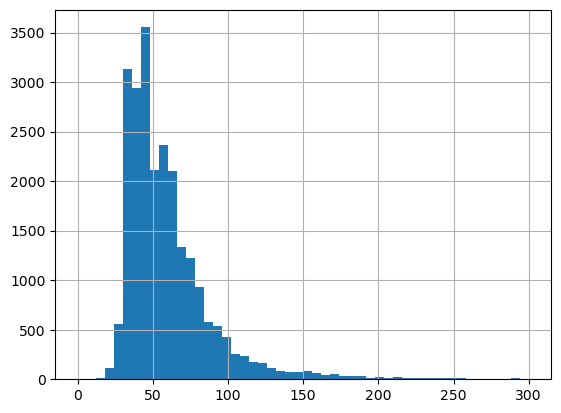

In [31]:
# Строим гистограмму для колонки 'total_area'
realty_data['total_area'].hist(bins=50, range=(0,300))
plt.show()

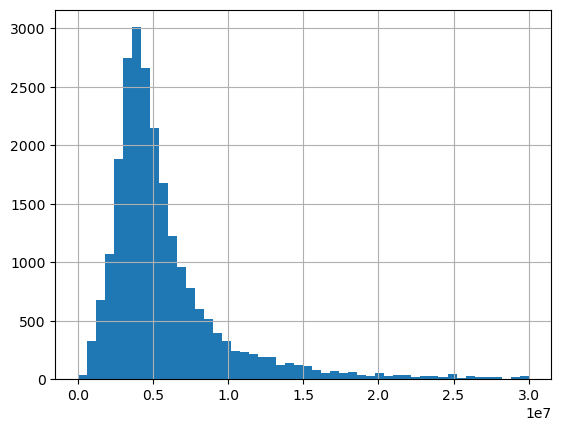

In [32]:
# Строим гистограмму для колонки 'last_price'
realty_data['last_price'].hist(bins=50, range=(0, 30000000))
plt.show()

Гистограммы площади и цены имеют очень схожее распределение, что может указывать на сильную взаимосвязь между этими параметрами.
Так же у них заметны сильные хвосты в правой части. Основная масса объявлений касается квартир с площадью от 25 до 100 квадратных метров и стоимостью от 1 000 000 до 10 000 000 рублей.

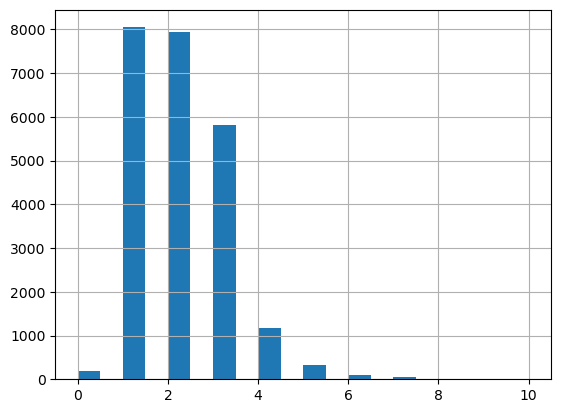

In [33]:
# Строим гистограмму для колонки 'rooms'
realty_data['rooms'].hist(bins=20, range=(0,10))
plt.show()

Больше всего объявлений по квартирам с 1-3 комантами. 

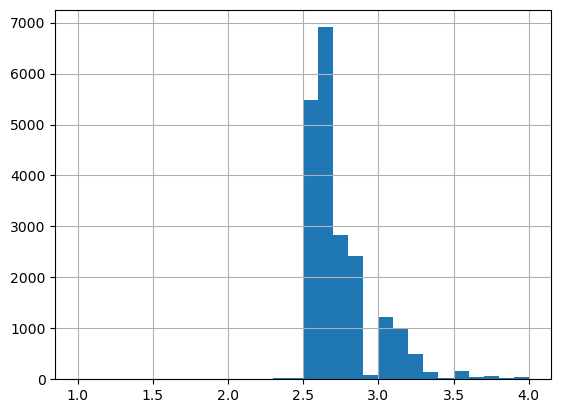

In [34]:
# Строим гистограмму для колонки 'ceiling_height'
realty_data['ceiling_height'].hist(bins=30, range=(1,4))
plt.show()

По высоте потолков заметен пик с потолками размером 2,6 м.

Изучим скорость продажи квартир. Построим гистограмму.

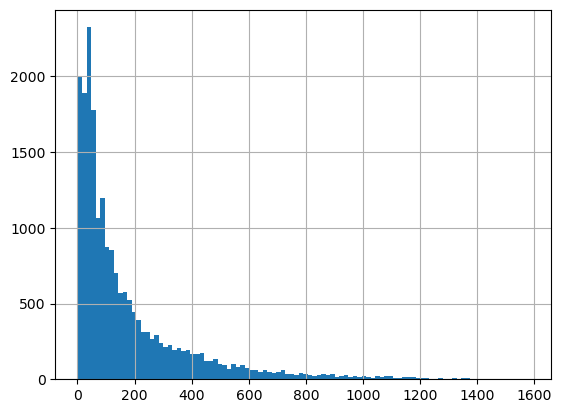

In [35]:
# Строим гистограмму для колонки 'days_exposition'
realty_data['days_exposition'].hist(bins=100)
plt.show()

Из графика мы видим, что большинство продаж занимают до 400 дней. К тому же видно, что основной пик продаж приходится на объявления со сроком размещения от 60 до 100 дней.

Посмотрим на среднее значение и медиану.

In [36]:
# Выведем информацию о распределении значений в колонке 'days_exposition'
realty_data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медиана в 2 раза меньше среднего значения, т.к. распределение имеет большой разброс значений. Половина продаж происходит к 95-му дню размещения объявления. Ориентируясь на полученные значения 25 и 75 квантилей можно предположить, что продажи, которые происходят в пределах 45 дней размещения объявления - это достаточно быстрые продажи, а продажи по объявлениям со сроком более 232 дней уже довольно долгие.

Построим гистограмму без слишком быстрых и долгих продаж.

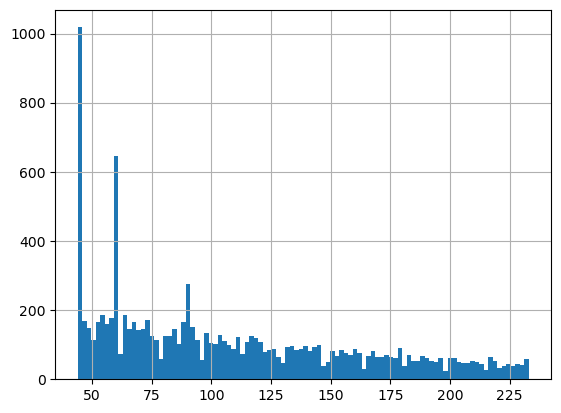

In [37]:
# Строим гистограмму для колонки 'days_exposition', установив ограничения
realty_data['days_exposition'].hist(bins=100, range=(44, 233))
plt.show()

На полученной гистограмме видно несколько сильных всплесков в областях 45, 60 и 90 дней.

Проверим зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Для этого создадим срез с интересующими колонками и построим матрицу рассеяния.

Для того, чтобы мы могли отобразить значения колонки `floor_group` в матрице рассеяния переведем значения колонки в числовые по принципу: значение 'первый' будет равнятся 1, 'последний' - 2, а 'другой' - 0. Создадим функцию, которая поменяет значения в колонке.

In [38]:
# Создадим список с названиями колонок, по которым будем строить матрицу рассеяния
price_factors = realty_data[['last_price', 'total_area', 'rooms', 'floor_group', 'cityCenters_nearest']].copy()

In [39]:
# Создадим функцию для перевод значений колонки 'floor_group' в числовые
def floors_to_int(floor):
    if floor == 'первый':
        return 1
    if floor == 'последний':
        return 2
    return 0

# Переведем значения колонки 'floor_group' в числовые
price_factors['floor_group'] = price_factors['floor_group'].apply(floors_to_int)

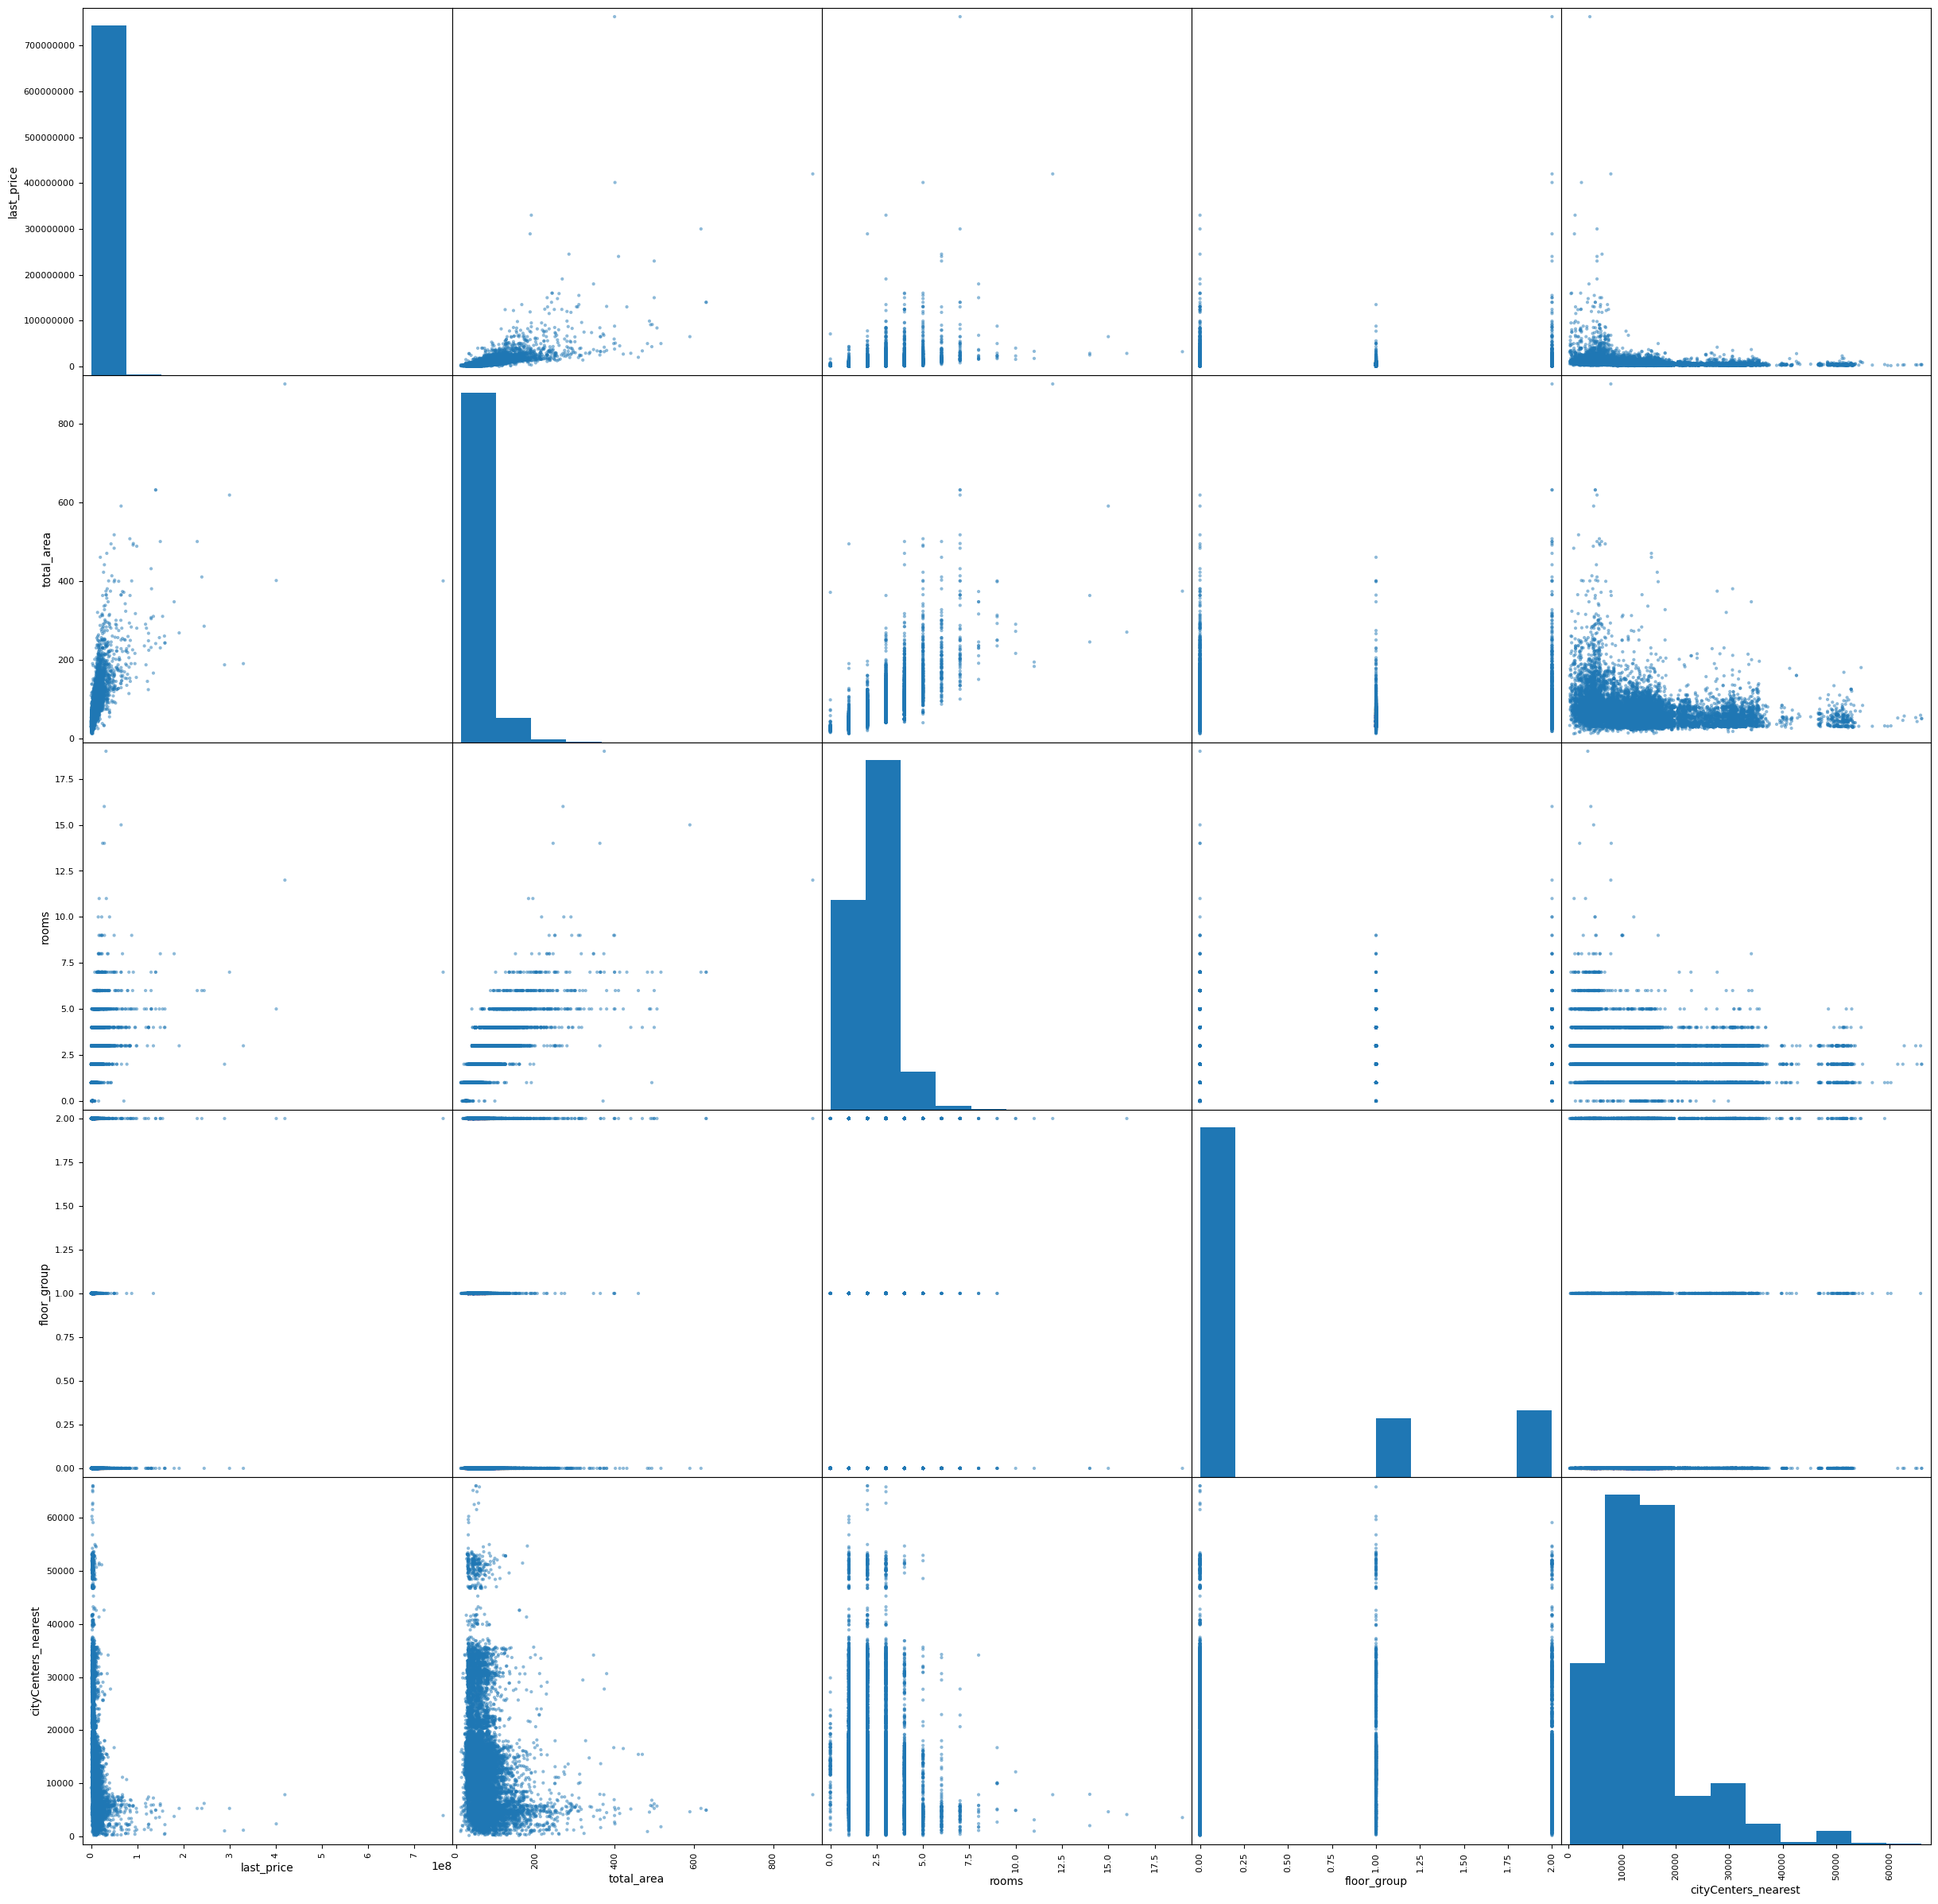

In [40]:
# Построим матрицу рассеяния
pd.plotting.scatter_matrix(price_factors, figsize=(30, 30))
plt.show()

По данным матрицы мы можем сказать, что сильнее всего стоимость квартиры коррелирует с размером площади. По остальным показателям нет сильной корреляции, но при этом заметны некоторые закономерности:
- Между стоимостью и количеством комнат заметна небольшая положительная корреляция. Видно, что 1-комнатные и 2-х комнатные квартиры не продаются дороже какого-то значения, так же видно что квартиры в которых есть от 3-х комнат и больше не продаются ниже определенного уровня цены.
- Между стоимостью и расстоянием от центра тоже заметна небольшая корреляция, чем ближе квартиры к центру - тем больше диапазон цен и  тем больше квартир по высокой цене, с отдалением от центра уровень цен и его диапазон сильно уменьшается.
- Между стоимостью и этажом тоже прослеживается закономерность, что квартиры на первом этаже не продаются по цене выше определенной, когда квартиры не на первом этаже могут достигать гораздо более высоких цен.

Для расчета корреляции необходимо избавиться от выбросов. Построим графики с усами, чтобы определить границы выбросов.

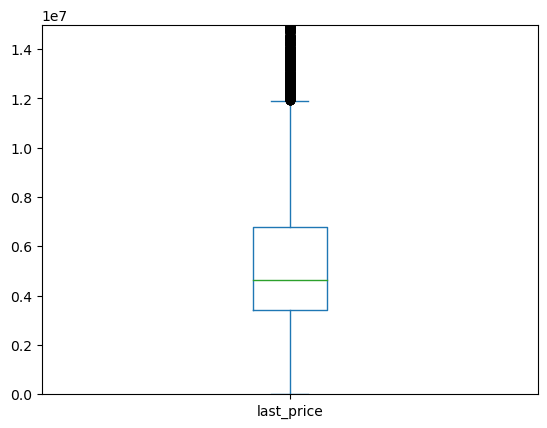

In [41]:
# Построим "график с усами" для стоимости квартир
price_factors['last_price'].plot.box(ylim=(0,15000000))
plt.show()

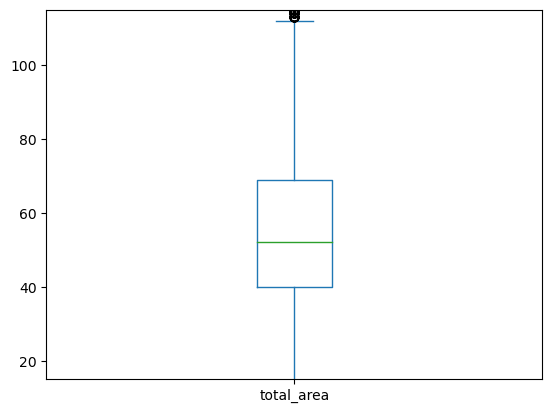

In [42]:
# Построим "график с усами" для общей площади квартир
price_factors['total_area'].plot.box(ylim=(15,115))
plt.show()

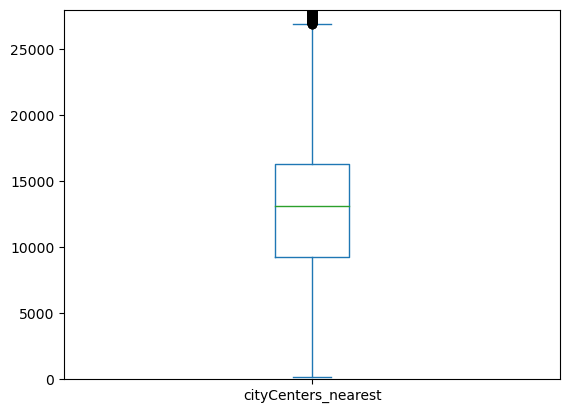

In [43]:
# Построим "график с усами" для расстояния до центра
price_factors['cityCenters_nearest'].plot.box(ylim=(0,28000))
plt.show()

In [44]:
# Отфильтруем данные, убрав выбросы
price_factors_clear = (price_factors
 .query("last_price < 12000000")
 .query("15 < total_area < 115")
 .query("cityCenters_nearest < 28000")
)

Рассчитаем коэффициенты корреляции. Для этажа и количества комнат не получится корректно рассчитать коэффициенты, т.к. у этих показателей порядковые значения. Их мы изучим отдельно рассмотрев медианные значения по группам.

In [45]:
# Выведем таблицу с корреляцией Пирсона
price_factors_clear[['last_price','total_area','cityCenters_nearest']].corr()['last_price']

last_price             1.000000
total_area             0.790920
cityCenters_nearest   -0.371598
Name: last_price, dtype: float64

По полученной таблице мы видим, что между ценой и площадью имеется сильная положительная корреляция, а между ценой и расстоянием корреляция отрицательная, но не так ярко выражена.

Изучим влияние этажа на цену. Выведем медиану цены по группам этажей для исходной таблицы.

In [46]:
# Выведем медиану по типу этажа
realty_data.groupby('floor_group')['last_price'].agg('median')

floor_group
другой       4850000.0
первый       3900000.0
последний    4300000.0
Name: last_price, dtype: float64

Чаще всего квартиры на первом этаже стоят дешевле, но разница в стоимости не большая и однозначно утверждать о сильном влиянии данного фактора на цену нет причин.

Изучим влияние количества комнат на цену. Выведем медиану цены по количеству комнат для исходной таблицы и построим график.

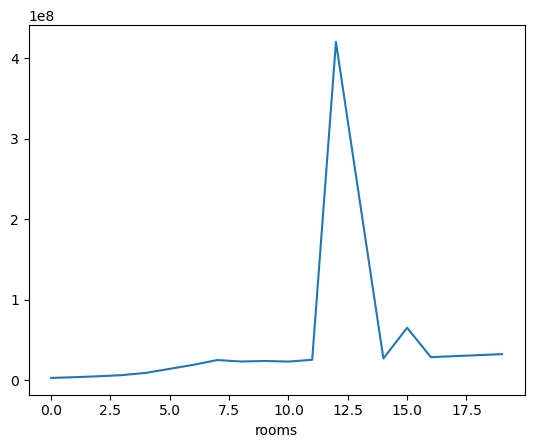

In [47]:
# Построим график для отображения зависимости количества комнат и медианноой стоимости квартиры
realty_data.groupby('rooms')['last_price'].agg('median').plot()
plt.show()

In [48]:
# Выведем количество объявлений в группах по количеству комнат
realty_data.groupby('rooms')['last_price'].agg('count')

rooms
0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: last_price, dtype: int64

На графике мы видим линейную зависимость между количеством комнат и медианной ценой. Так же виден сильный пик для 12 комнат - но это значение может быть случайным выбросом, т.к. медиана была рассчитана на основе одного объявления.

Изучим, как дата размещения объявления влияет на стоимость квартиры.

In [49]:
# Создадим список с названиями колонок, по которым будем строить матрицу рассеяния
price_factors = realty_data[['last_price', 'weekday', 'month', 'year']]

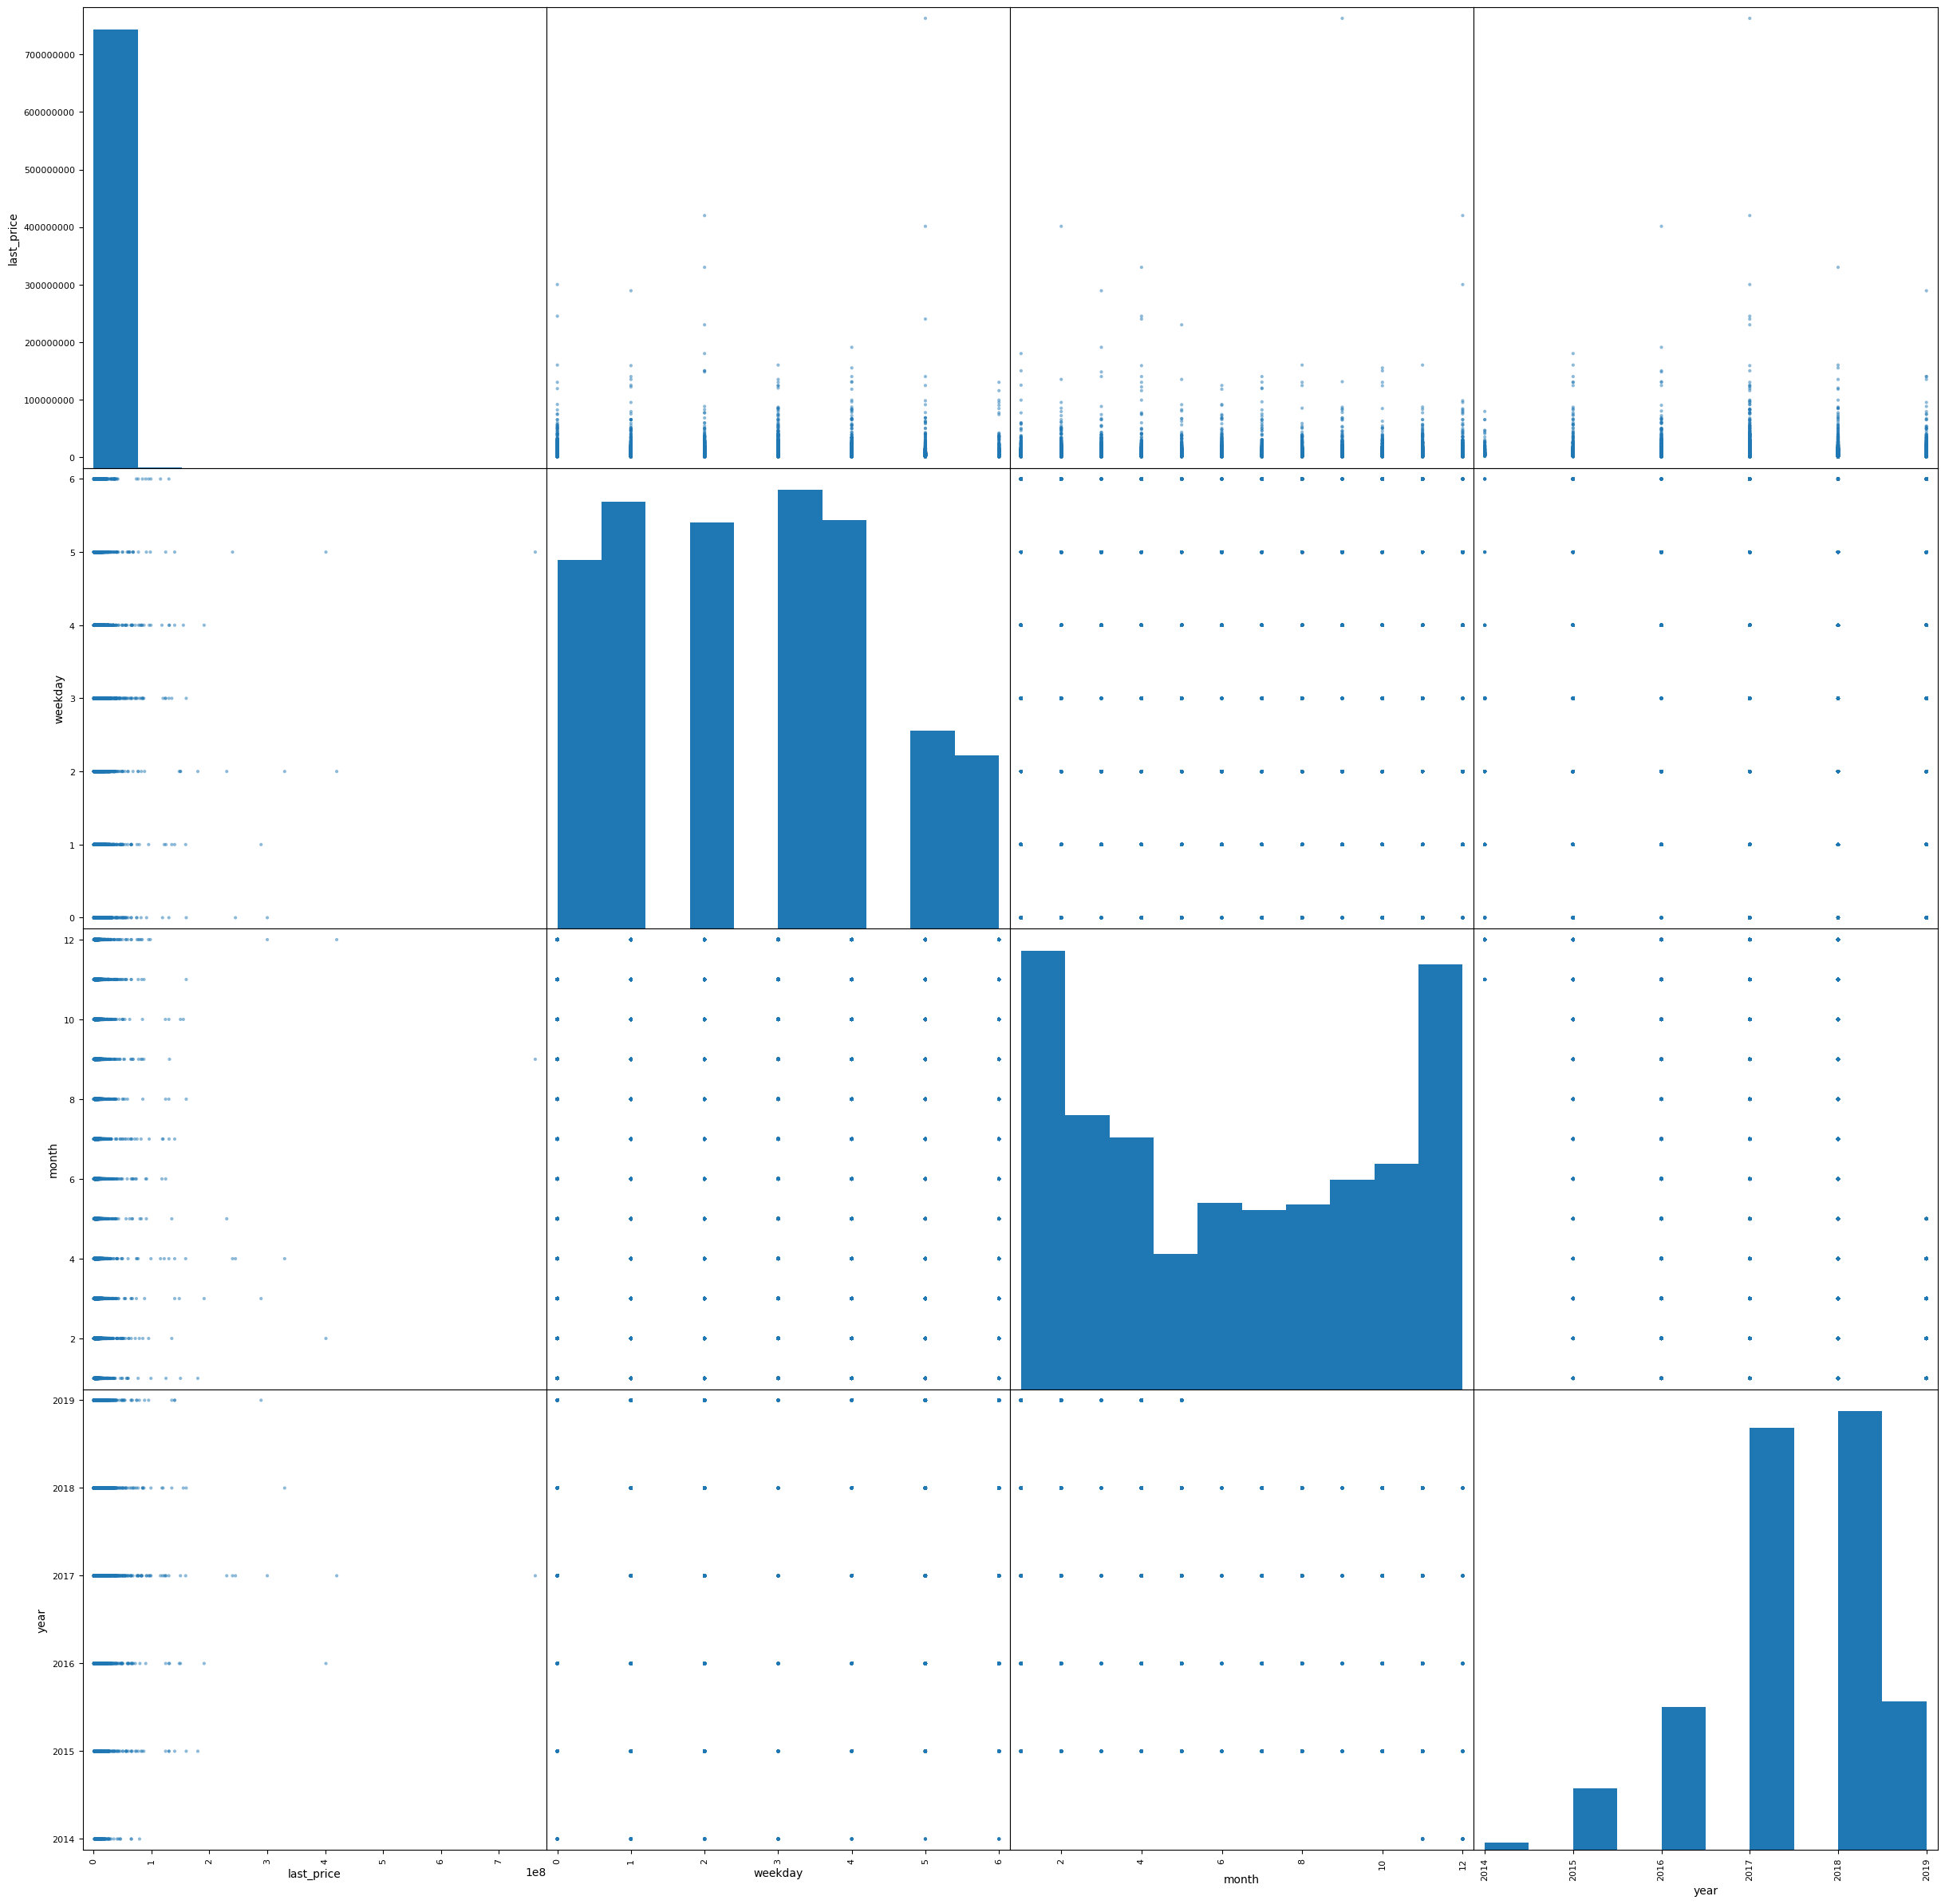

In [50]:
# Построим матрицу рассеяния
pd.plotting.scatter_matrix(price_factors, figsize=(30,30))
plt.show()

In [51]:
# Выведем таблицу с корреляцией Пирсона
price_factors.corr()

,last_price,weekday,month,year
last_price,1.000000,0.001550,0.002779,-0.043089
weekday,0.001550,1.000000,0.011496,-0.004799
month,0.002779,0.011496,1.000000,-0.269642
year,-0.043089,-0.004799,-0.269642,1.000000


На диаграмме рассеяния и в таблице корреляции зависимости не заметны между ценой и датой размещения. Т.к. корреляция указывает на наличие линейной зависимости, то изучим зависимости между датой и ценой при помощи сводных таблиц и графиков. Возможно, зависимости окажутся нелинейными.

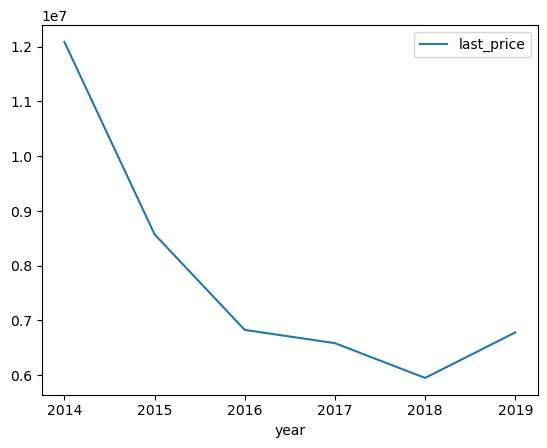

In [52]:
# Выведем график для года размещения объявления
price_factors.pivot_table(index=['year'], values='last_price', aggfunc='mean').plot()
plt.show()

In [53]:
# Выведем сводную таблицу для года размещения объявления
price_factors.pivot_table(index=['year'], values='last_price', aggfunc='mean')
plt.show()

На графике виден спад стоимости квартиры с 2014 по 2018 год, а в 2019 году цены начали повышаться.

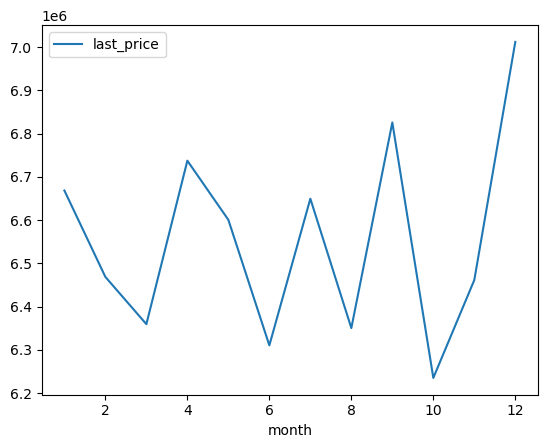

In [54]:
# Выведем график для месяца размещения объявления
price_factors.pivot_table(index=['month'], values='last_price', aggfunc='mean').plot()
plt.show()

Заметны следующие пики роста цен относительно месяца публикации объявления:<br>
Увеличение цен, как правило, приходится на начало квартала (январь, апрель, июль), на начало сентября и в конце года (декабрь).

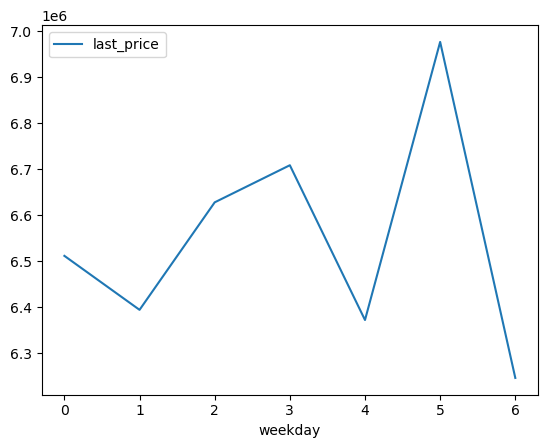

In [55]:
# Выведем график для дня недели размещения объявления
price_factors.pivot_table(index=['weekday'], values='last_price', aggfunc='mean').plot()
plt.show()

На графике по дням недели заметен всплеск увеличения цен по субботам.

Выведем 10 населенных пунктов с наибольшим количеством объявлений.

In [56]:
# Создадим переменную для хранения среза по топ-10 регионам по количеству объявлений, отсортировав значения по убыванию
top10_count = (
    realty_data.pivot_table(index='locality_name', values='last_price', aggfunc='count')
    .sort_values(by='last_price', ascending=False)
    .head(10)
)

# Выведем топ-10 регионов
top10_count

,last_price
locality_name,
Санкт-Петербург,15721
посёлок Мурино,522
посёлок Шушары,440
Всеволожск,398
Пушкин,369
Колпино,338
посёлок Парголово,327
Гатчина,307
деревня Кудрово,299


Посчитаем среднюю цену квадратного метра в полученных населенных пунктах.

In [57]:
# Создадим переменную для рассчета средней цены за квадратный метр для регионов из топ-10
top10_avg_meters = (
    realty_data.query("locality_name in @top10_count.index")
    .pivot_table(index='locality_name', values='m2_price')
    .sort_values('m2_price', ascending=False)
)

# Выведем полученную таблицу
top10_avg_meters

,m2_price
locality_name,
Санкт-Петербург,115347.299472
Пушкин,103610.948509
деревня Кудрово,93001.742475
посёлок Парголово,90675.235474
посёлок Мурино,86379.549808
посёлок Шушары,79068.186364
Колпино,75735.150888
Гатчина,69045.068404
Всеволожск,68984.801508


Исходя из полученных данных самая высокая цена за метр в Санкт-Петербурге и Пушкине, а самая низкая цена - во Всеволожске и в Выборге.

Выясним как меняется цена в зависимости от расстояния до центра на примере Санкт-Петербурга. Для начала рассчитаем в новой колонке расстояние до центра в километрах.

In [58]:
# Создадим срез по Санкт-Петербургу
spb_data = realty_data.query("locality_name == 'Санкт-Петербург'").copy()

In [59]:
# Создадим колонку с расстоянием до центра в километрах
spb_data['cityCenters_nearest_km'] = round(spb_data['cityCenters_nearest'] / 1000)

Выведем на графике среднюю цену в зависимости от расстояния  до центра.

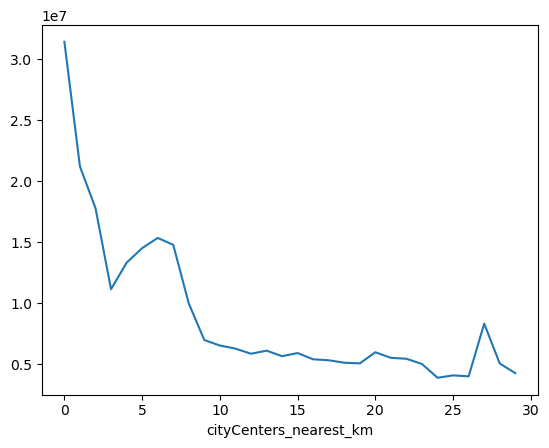

In [60]:
# Строим график для средней цены квартиры для каждого километра от центра
spb_data.groupby('cityCenters_nearest_km')['last_price'].agg('mean').plot()
plt.show()

На графике видно, что в среднем цена уменьшается при отдалении от центра. Мы видим, что имеется увеличение цены в области от 3 и до 6 км, и небольшой пик в области 22 км. В данном случае моожно утверждать, что расстояние до центра имеет зависимость с ценой.

In [61]:
# Выведем первые 15 сгруппированных значений
spb_data.groupby('cityCenters_nearest_km')['last_price'].agg('mean').head(15)

cityCenters_nearest_km
0.0     3.144912e+07
1.0     2.120672e+07
2.0     1.778832e+07
3.0     1.112658e+07
4.0     1.330428e+07
5.0     1.449912e+07
6.0     1.533842e+07
7.0     1.477515e+07
8.0     9.957717e+06
9.0     6.950659e+06
10.0    6.504119e+06
11.0    6.250815e+06
12.0    5.828545e+06
13.0    6.083141e+06
14.0    5.629101e+06
Name: last_price, dtype: float64

Резкое изменение цен происходит в районе 8 км, соответственно где-то на таком расстоянии и находится граница центра.

Изучим взаимосвязь стоимости квартиры с другими параметрами для центральной части Санкт-Петербурга. Выделим данные по центру города в новую переменную.

In [62]:
# Создадим срез по Санкт-Петербургу для квартир, расположенных в центре
spb_center_data = spb_data.query("cityCenters_nearest_km < 8")

In [63]:
# Создадим список с названиями колонок, по которым будем строить матрицу рассеяния
spb_center_price_factors = spb_center_data[['last_price', 'total_area', 'rooms', 'floor_group', 'ceiling_height']]

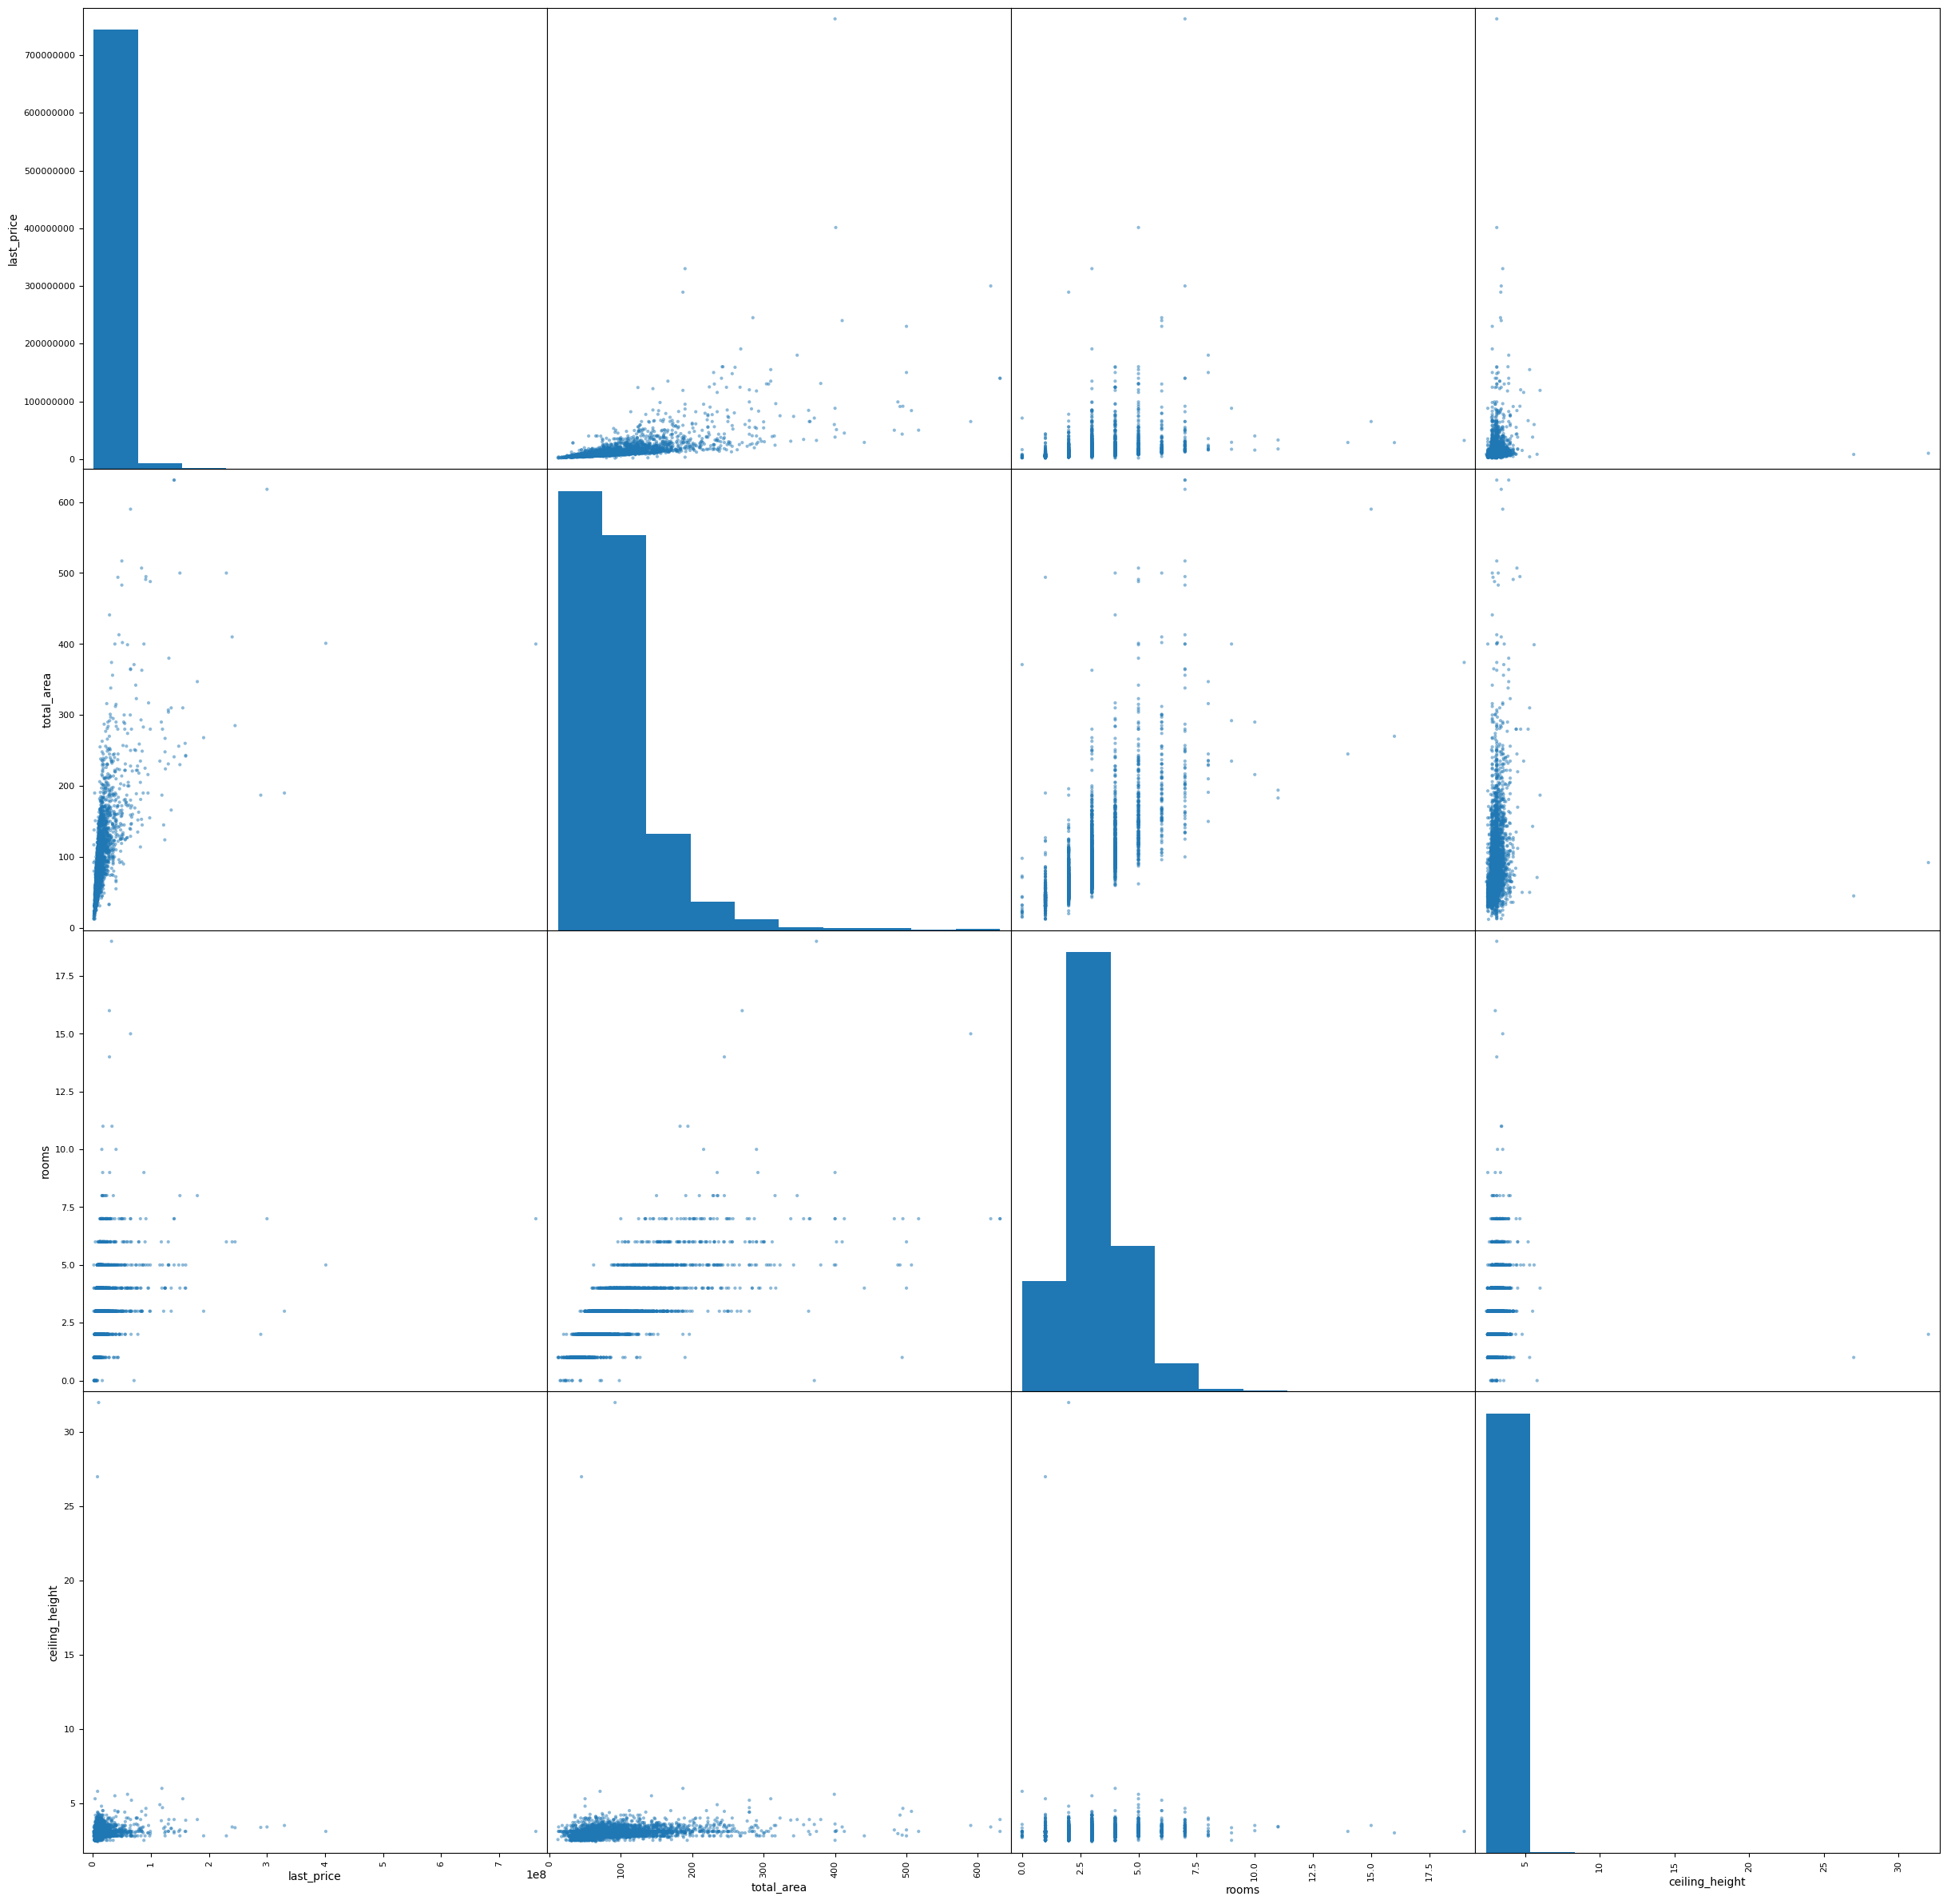

In [64]:
# Построим матрицу рассеяния
pd.plotting.scatter_matrix(spb_center_price_factors, figsize=(30,30))
plt.show()

In [65]:
# Выведем таблицу с корреляцией Пирсона
spb_center_price_factors.corr()

,last_price,total_area,rooms,ceiling_height
last_price,1.000000,0.613499,0.314874,0.074450
total_area,0.613499,1.000000,0.730398,0.129184
rooms,0.314874,0.730398,1.000000,0.097320
ceiling_height,0.074450,0.129184,0.097320,1.000000


Матрица рассеяния по объявлениям квартир из центра Санкт-Петербурга показывает такие же результаты, как и по всем регионам.

In [66]:
# Создадим список с названиями колонок, по которым будем выявлять зависимости по дате размещения
spb_center_date_factors = spb_center_data[['last_price', 'year', 'month', 'weekday']]

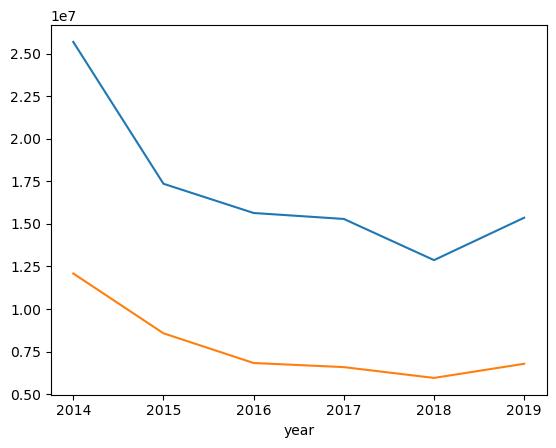

In [67]:
# Выведем график для года размещения объявления
spb_center_date_factors.groupby('year')['last_price'].agg('mean').plot()
price_factors.groupby('year')['last_price'].agg('mean').plot()
plt.show()

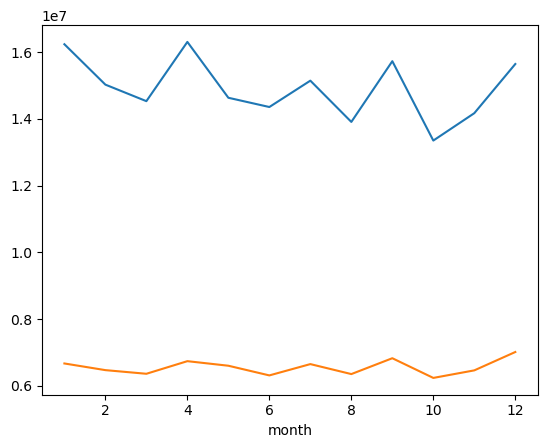

In [68]:
# Выведем график для месяца размещения объявления
spb_center_date_factors.groupby('month')['last_price'].agg('mean').plot()
price_factors.groupby('month')['last_price'].agg('mean').plot()
plt.show()

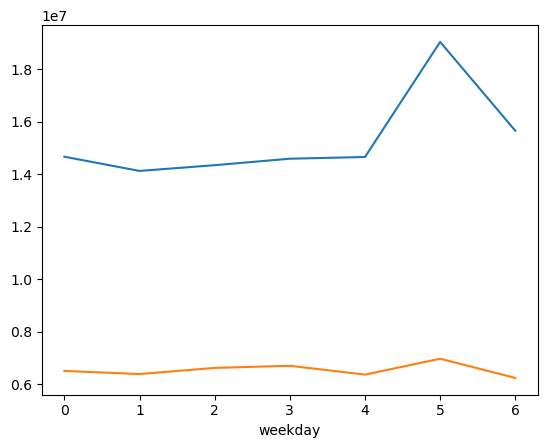

In [69]:
# Выведем график для дня недели размещения объявления
spb_center_date_factors.groupby('weekday')['last_price'].agg('mean').plot()
price_factors.groupby('weekday')['last_price'].agg('mean').plot()
plt.show()

Полученные графики по данным центра города очень похожи на графики, полученные по всему распределению, расположение пиков в тех же самых местах, но для объявлений в центре города характерны более сильные изменения цен в пиковых областях. Основное различие в том, что для объявлений в центре стоимость квартир сильно выше, чем в среднем по всему распределению.

Сравним распределения факторов для квартир, находящихся в центре и для всех квартир в городе.

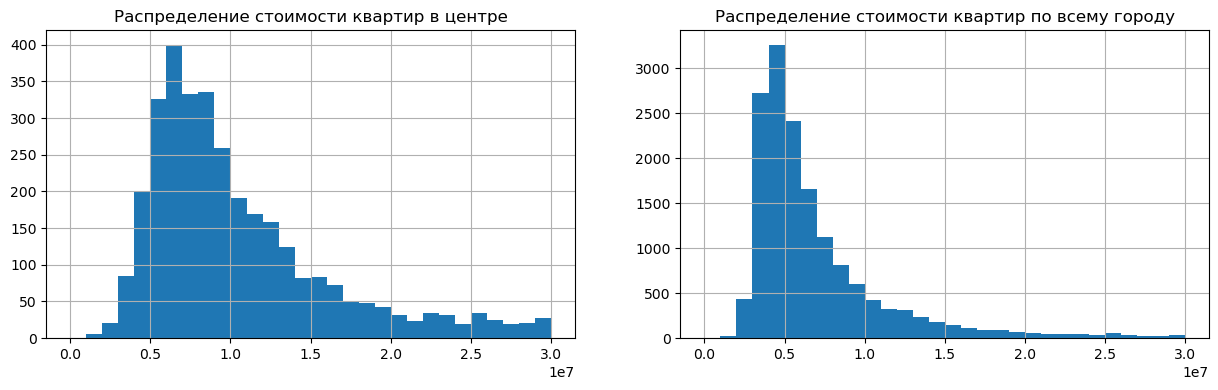

In [70]:
fig, axes = plt.subplots(1,2,figsize=(15,4))

spb_center_data['last_price'].hist(bins=30, ax=axes[0], range=(0,30000000))
spb_data['last_price'].hist(bins=30, ax=axes[1], range=(0,30000000))

axes[0].set_title('Распределение стоимости квартир в центре')
axes[1].set_title('Распределение стоимости квартир по всему городу')

plt.show()

Для квартир в центре характерен более широкий диапазон цен и наличие большого количества объявлений с ценами выше 10 000 000 рублей.

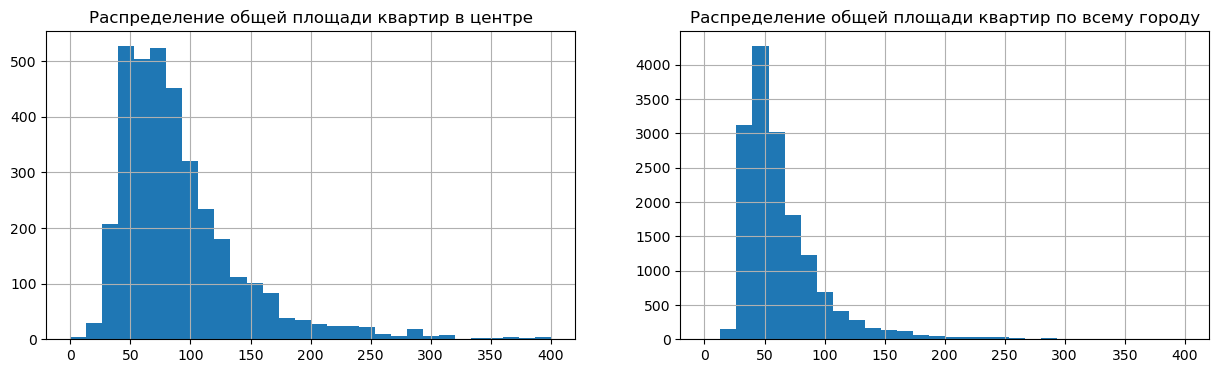

In [71]:
fig, axes = plt.subplots(1,2,figsize=(15,4))

spb_center_data['total_area'].hist(bins=30, ax=axes[0], range=(0,400))
spb_data['total_area'].hist(bins=30, ax=axes[1], range=(0,400))

axes[0].set_title('Распределение общей площади квартир в центре')
axes[1].set_title('Распределение общей площади квартир по всему городу')

plt.show()

Квартиры в центре имеют и больший размах по размеру общей площади, в отличии от всего распределения. В центре довольно значительная часть объявлений относится к квартирам с общей площадью от 100 кв.м.

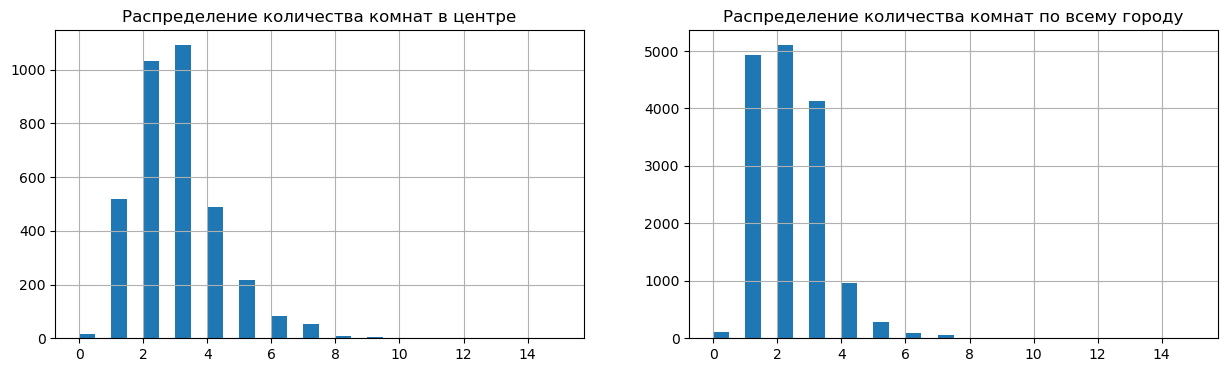

In [72]:
fig, axes = plt.subplots(1,2,figsize=(15,4))

spb_center_data['rooms'].hist(bins=30, ax=axes[0], range=(0,15))
spb_data['rooms'].hist(bins=30, ax=axes[1], range=(0,15))

axes[0].set_title('Распределение количества комнат в центре')
axes[1].set_title('Распределение количества комнат по всему городу')

plt.show()

В среднем по городу больше преобладают 1-комнатные и 2-х комнатные квартиры, когда в центре больше объявлений для 2-х и 3-х комнатных квартир.

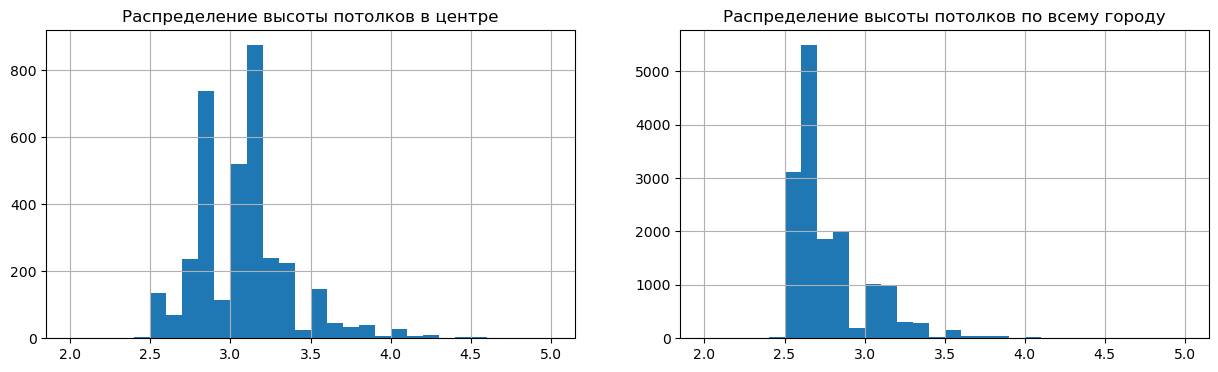

In [73]:
fig, axes = plt.subplots(1,2,figsize=(15,4))

spb_center_data['ceiling_height'].hist(bins=30, ax=axes[0], range=(2,5))
spb_data['ceiling_height'].hist(bins=30, ax=axes[1], range=(2,5))

axes[0].set_title('Распределение высоты потолков в центре')
axes[1].set_title('Распределение высоты потолков по всему городу')

plt.show()

В центре много объявлений для квартир с высотой потолков более 3-х метров, тогда как для всего города характерна  высота потолков ближе к 2,5 метрам.

### Вывод

Мы сравнили взаимосвязь различных показателей на стоимость квартир и выявили следующие факторы, влияющие на стоимость квартиры: площадь квартиры, количество комнат в квартире, этаж, удаленность от центра, месяц размещения, день недели размещения.

Были определены границы центра в Санкт-Петербурге и была изучена взаимосвязь факторов только по этим объявлниям. Матрица рассеяния показала, что корреляция по данному срезу идентична корреляции факторов по всей выборке.

Так же было проведено сравнение факторов между объявлениями квартир в центре города с объявлениями по всему городу. Можно сказать, что для квартир в центре характерны большее количество комнат, большая площадь и большая высота потолков. Фактор близости к центру так же сильно влияет на стоимость квартир.

## Общий вывод

В результате анализа были выявлены следующие факторы, определяющие стоимость квартиры: 
- площадь квартиры;
- количество комнат в квартире;
- этаж;
- месяц размещения;
- день недели размещения;
- удаленность от центра.

Сильнее всего на стоимость влияют общая площадь квартиры и расстояние до центра. Влияние расстояния до центра на стоимость может объясняться тем, что чаще всего квартиры в центре имеют больший метраж и размеры (площадь, высота потолков, количество комнат).

Графики показывали определенные всплески в некоторые месяцы и дни недели размещения. Вероятно, это связано с поведением потенциальных покупателей, которые более активны в какие-то конкретные месяцы и дни недели.